# Log likelihood calculation

$L(\theta) = -2\theta T + \int_0^T ((\alpha_s)_+ - (\alpha_s)_-)ds + \sum_{i=1}^{m+} log [(\alpha_{t_i}^{+ -})_+ + \theta] + \sum_{i=1}^{m+} log [(\alpha_{t_i}^{- -})_- + \theta]$

$\alpha_{t^-} = \eta^+ \sum_{i=1}^{n+}e^{-k(t-\tau_i^{0+})}1{t>\tau_i^{0+}} - \sum_{i=1}^{n-}e^{-k(t-\tau_i^{0-})}1{t>\tau_i^{0-}}$

https://docs.scipy.org/doc/scipy/tutorial/optimize.html

## First try

In [2]:
import numpy as np
from scipy.optimize import minimize
def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])  # the 4 parameters to optimize
res = minimize(rosen, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


In [3]:
res


       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 4.861153433422115e-17
             x: [ 1.000e+00  1.000e+00  1.000e+00  1.000e+00  1.000e+00]
           nit: 339
          nfev: 571
 final_simplex: (array([[ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       ...,
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00],
                       [ 1.000e+00,  1.000e+00, ...,  1.000e+00,
                         1.000e+00]]), array([ 4.861e-17,  7.652e-17,  8.114e-17,  8.633e-17,
                        8.641e-17,  2.179e-16]))

In [4]:
import numpy as np
from scipy.optimize import minimize
from likelihood import MaximumLikelihood

T = 0.001
tau_0_plus = np.array([[0.1, 0.3, 0.5, 0.7, 0.9]]) * T
tau_0_minus = np.array([[0.2, 0.4, 0.6]]) * T
t_plus = np.array([[0.11, 0.31, 0.51, 0.71, 0.91]]) * T
t_minus = np.array([[0.21, 0.41, 0.61]]) * T

m = MaximumLikelihood(T, tau_0_plus, tau_0_minus, t_plus, t_minus)

x0 = np.array([1.3, 0.7, 0.8, 1.9])  # the 4 parameters to optimize
res = minimize(m.likelihood_to_minimize, x0, method='nelder-mead',
               options={'xatol': 1e-8, 'disp': True})
res

/var/folders/rr/nsd1p9hx6hs_81m8swcypvkc0000gn/T/ipykernel_52919/1025083622.py:14: RuntimeWarning: Maximum number of function evaluations has been exceeded.
  res = minimize(m.likelihood_to_minimize, x0, method='nelder-mead',


       message: Maximum number of function evaluations has been exceeded.
       success: False
        status: 1
           fun: -9.762244064601471e+24
             x: [ 1.288e+02  7.611e+27 -1.485e+28  1.925e+28]
           nit: 476
          nfev: 800
 final_simplex: (array([[ 1.288e+02,  7.611e+27, -1.485e+28,  1.925e+28],
                       [ 1.471e+02,  5.337e+27, -1.041e+28,  1.350e+28],
                       ...,
                       [ 1.745e+02,  3.856e+27, -7.524e+27,  9.753e+27],
                       [ 1.874e+02,  2.957e+27, -5.770e+27,  7.479e+27]]), array([-9.762e+24, -6.637e+24, -5.238e+24, -4.572e+24,
                       -3.426e+24]))

## Calculating integral of alpha_s

In [5]:
T=10
tau_0_plus = np.array([[0.1, 0.3, 0.5,0.7,0.9]]) * T
tau_0_minus = np.array([[0.2, 0.4, 0.6]])*T
tau_0 = np.concatenate(
    [np.zeros([1,1]), tau_0_minus, tau_0_plus, np.ones([1,1]) * T], axis=1
)

eta_plus = 100
eta_minus = 90
k = 200
eta_minus_vector = -np.ones([tau_0_minus.shape[1], 1]) * eta_minus
eta_plus_vector = np.ones([tau_0_plus.shape[1], 1]) * eta_plus
eta_vector = np.concatenate(
    [np.zeros([1,1]), eta_minus_vector, eta_plus_vector, np.zeros([1,1])], axis=0
).T
tau_eta = np.concatenate([tau_0, eta_vector])
result = eta_vector.T * np.ones([1, tau_0.shape[1]])

#tau_0.sort()
tau_eta = tau_eta[:,tau_eta[0, :].argsort()]
tau_0 = tau_eta[:,tau_eta[0, :].argsort()][0:1,:]
eta_0 = tau_eta[:,tau_eta[0, :].argsort()][1:2,:]
#print(result.T)
print(tau_eta)


[[  0.   1.   2.   3.   4.   5.   6.   7.   9.  10.]
 [  0. 100. -90. 100. -90. 100. -90. 100. 100.   0.]]


In [6]:
np.exp(-k*tau_0_plus)
tau_matrix = tau_0 * np.ones([1, tau_0.shape[1]]).T
tau_matrix

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.]])

In [7]:
np.exp(-k*tau_0_plus)
eta_matrix = eta_0 * np.ones([1, eta_0.shape[1]]).T
eta_matrix

array([[  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.],
       [  0., 100., -90., 100., -90., 100., -90., 100., 100.,   0.]])

In [8]:
tau_matrix_1 = np.roll(tau_matrix,-1) # numero de fila es j, numero de columna es i
tau_matrix_1

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.]])

In [9]:
tau_matrix_diff = tau_matrix - tau_matrix.T
tau_matrix_diff

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   9.,  10.],
       [ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   8.,   9.],
       [ -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.],
       [ -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   6.,   7.],
       [ -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   5.,   6.],
       [ -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   4.,   5.],
       [ -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   3.,   4.],
       [ -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   2.,   3.],
       [ -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,   0.,   1.],
       [-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -1.,   0.]])

In [10]:
tau_matrix_diff

array([[  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   9.,  10.],
       [ -1.,   0.,   1.,   2.,   3.,   4.,   5.,   6.,   8.,   9.],
       [ -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   5.,   7.,   8.],
       [ -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   4.,   6.,   7.],
       [ -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   3.,   5.,   6.],
       [ -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   2.,   4.,   5.],
       [ -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,   3.,   4.],
       [ -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   2.,   3.],
       [ -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,   0.,   1.],
       [-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -1.,   0.]])

In [11]:
tau_matrix_diff = np.where(tau_matrix_diff>0, tau_matrix_diff, 0)
tau_matrix_diff

array([[ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.],
       [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  9.],
       [ 0.,  0.,  0.,  1.,  2.,  3.,  4.,  5.,  7.,  8.],
       [ 0.,  0.,  0.,  0.,  1.,  2.,  3.,  4.,  6.,  7.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  3.,  5.,  6.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,  5.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  4.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [12]:
arr = np.array([[1,2,3,3],[4,5,6,6]])
print(arr)
np.sum(arr, axis=0)

[[1 2 3 3]
 [4 5 6 6]]


array([5, 7, 9, 9])

In [13]:
tau_matrix_diff_1 = tau_matrix_1 - tau_matrix.T
tau_matrix_diff_1 = np.where(tau_matrix_diff_1>0, tau_matrix_diff_1, 0)
tau_matrix_diff_1


array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  9., 10.,  0.],
       [ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  8.,  9.,  0.],
       [ 0.,  0.,  1.,  2.,  3.,  4.,  5.,  7.,  8.,  0.],
       [ 0.,  0.,  0.,  1.,  2.,  3.,  4.,  6.,  7.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  2.,  3.,  5.,  6.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  2.,  4.,  5.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  4.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.,  3.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

In [14]:
tau_matrix_diff = tau_matrix - tau_matrix.T
tau_matrix_diff = np.where(tau_matrix_diff>0, tau_matrix_diff, 0)

tau_matrix_diff_1 = tau_matrix_1 - tau_matrix.T
tau_matrix_diff_1 = np.where(tau_matrix_diff_1>0, tau_matrix_diff_1, 0)

alpha_tau_matrix = eta_matrix * (np.exp(
    -k * tau_matrix_diff_1
) - np.exp(-k * tau_matrix_diff))

alpha_tau_matrix

array([[-0.00000000e+000, -1.38389653e-085,  1.72365264e-172,
        -2.65039655e-259, -0.00000000e+000,  0.00000000e+000,
        -0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000, -1.00000000e+002,  1.24550687e-085,
        -1.91516960e-172,  2.38535690e-259,  0.00000000e+000,
        -0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000,  9.00000000e+001,
        -1.38389653e-085,  1.72365264e-172, -2.65039655e-259,
        -0.00000000e+000,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000, -0.00000000e+000,
        -1.00000000e+002,  1.24550687e-085, -1.91516960e-172,
         2.38535690e-259,  0.00000000e+000,  0.00000000e+000,
         0.00000000e+000],
       [ 0.00000000e+000,  0.00000000e+000, -0.00000000e+000,
         0.00000000e+000,  9.00000000e+001, -1.38389653e-085,
         1.72365264e-172

In [15]:
alpha_tau = np.sum(alpha_tau_matrix, axis=0)
alpha_tau

array([   0., -100.,   90., -100.,   90., -100.,   90., -100., -100.,
          0.])

Alpha tau should be possitive. I don't know why are they using - 1/k. May be I should modifty it to be possitive inverting the simbols

In [16]:
alpha_s_plus = np.sum(-np.where(alpha_tau>=0,alpha_tau, 0)/k)
alpha_s_plus 

-1.35

In [17]:
alpha_s_minus = np.sum(np.where(alpha_tau<=0,alpha_tau, 0)/k)
alpha_s_minus

-2.5

In [18]:
integral_alpha_s = alpha_s_plus - alpha_s_minus
integral_alpha_s


1.15

## Calculating sum log alpha t_i

In [19]:
import numpy as np
T=10
tau_0_plus = np.array([[0.1, 0.3, 0.5,0.7,0.9]]) * T
tau_0_minus = np.array([[0.2, 0.4, 0.6]])*T
t_plus = np.array([[0.11, 0.31, 0.51, 0.71, 0.91]]) * T
t_minus = np.array([[0.21, 0.41, 0.61]]) * T
eta_plus = 100
eta_minus = 90
k = 200
theta = 1

tau_0 = np.concatenate(
    [
        tau_0_minus,
        tau_0_plus,
    ],
    axis=1,
)

eta_minus_vector = -np.ones([tau_0_minus.shape[1], 1]) * eta_minus
eta_plus_vector = np.ones([tau_0_plus.shape[1], 1]) * eta_plus
eta_vector = np.concatenate([eta_minus_vector, eta_plus_vector], axis=0).T
tau_eta = np.concatenate([tau_0, eta_vector])
tau_eta = tau_eta[:, tau_eta[0, :].argsort()]
tau_0 = tau_eta[:, tau_eta[0, :].argsort()][0:1, :]
eta_0 = tau_eta[:, tau_eta[0, :].argsort()][1:2, :]

tau_matrix = tau_0 * np.ones([1, t_plus.shape[1]]).T
eta_matrix = eta_0 * np.ones([1, t_plus.shape[1]]).T
t_plus_matrix = t_plus.T * np.ones([1, tau_0.shape[1]])  # numero de fila es t, numero de columna es tau

tau_matrix_diff = t_plus_matrix - tau_matrix 
tau_matrix_diff = np.where(tau_matrix_diff > 0, tau_matrix_diff, 0)

alpha_tau_matrix = eta_matrix * (np.exp(-k * tau_matrix_diff))
alpha_tau = np.sum(alpha_tau_matrix, axis=1)
# The signs seem to be wrong in the paper, keeping them anyway
sum_log_alpha_plus = np.sum(np.log(np.where(alpha_tau >= 0, alpha_tau, 0) + theta))
sum_log_alpha_plus

18.995638800241302

## Generating simulation data to estimate parameters


In [171]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 30
p.n = 1000
print(p)
results = generate_simulations_bunchs(p)


Parameters(q_max=4, T=60, A=300, dalpha=30, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=1.0, lambda_minus=1.0, theta=0.1, s0=100, n=1000, drift=True)
Calculating h
Starting h calculation
0.0004995003608890108
120120
Starting to calculate h
Finished calculating h0.0 h                          e-07 h                            
Amount of simulations: 500
Mean of PNL:0.2264199999998511880946e-06 h                              
Stde of PNL:0.2059392716313217
Amount of simulations: 500
Mean of PNL:0.21580999999984407218968e-06 h                             
Stde of PNL:0.1964840805257168
1000


In [209]:
l = 100

## Option A: Flattening of times


In [4]:
tau0_plus = np.array([
    np.array(np.where(results["dMt0_plus"][:l,:])[1]
                               ) .flatten()
                      *p.dt]
                      )
tau0_minus = np.array([
    np.array(np.where(results["dMt0_minus"][:l,:])[1]
                                ) .flatten()
                       *p.dt]
)

print("Tau 0 minus ", tau0_minus)
print("Tau 0 plus ", tau0_plus)

Tau 0 minus  [[ 1.08291678  2.37362571  4.9890096   5.1208777   6.90709099  6.97552254
   7.72277508  8.22177594  8.97452298 12.28421238 13.18680953 13.80668948
  13.81218398 16.06443111 18.51298188 19.09140329 22.11387998 22.38710667
  24.79819492 25.76972312 26.59689572 27.86662563 28.98051144 30.18180981
  30.63235913 31.18580553 31.98900211 32.32666436 32.50948149 34.07291762
  34.48850192 34.51097943 35.4370531  36.30718273 37.55893064 39.37411495
  40.89359505 43.96502276 44.74174583 46.81966733 47.34713971 48.09489175
  49.35712916 49.4135727  49.57840782 51.15433146 52.1808047  52.44104439
  52.49748793 53.06541984 53.31067452 53.61836674 54.47401086 55.356628
  56.49698732 56.52695734 56.53544885 56.76721701  0.19730264  0.81618359
   1.72677275  2.19730209  2.75124799  3.22327583  3.94455435  4.06443444
   4.13436449  6.57442375  6.67432382  8.33366402  8.47352412  8.65134625
   8.91757994  9.86113612 10.05344376 12.25873786 13.142354   14.16732874
  15.0799159  16.16832718 1

In [5]:
tau0_minus.shape

(1, 290)

In [7]:
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus = np.array([(np.array(np.where(s_jumps[:l,:] < 0)[1]).flatten() 
                     * p.dt)])
t_plus = np.array([np.array(np.where(s_jumps[:l,:] > 0)[1]).flatten() 
                   * p.dt])
print("t_minus", t_minus)
print("t_plus", t_plus)
print("s_jumps", s_jumps)

t_minus [[ 1.09190779  1.85814134  6.91308499  7.72727058  8.22427344  8.22976795
  16.06842711 22.38910468 22.39110268 24.5004927  24.80318992 26.59739522
  27.05194055 27.5469454  27.87561664 32.51397699 34.49249792 34.51197843
  36.31467524 37.57541415 40.90758106 44.1478399  49.57990632 51.15582996
  53.06591934 53.22376145 53.31117402 56.52895534  0.20529465  1.61738217
   1.78671279  8.33416352  8.33865902  8.48301463 10.16583134 12.25973686
  13.1438525  19.19829637 19.26073392 21.98450938 24.32666658 29.56093086
  29.56942236 29.9010906  31.87311803 35.8511389  36.5374524  38.22576362
  39.20728183 40.15483401 40.15733151 41.61886957 43.86512269 44.51247516
  46.85113585 50.3836024  51.72326237 54.34513976  2.02547396  2.39060873
  14.93006579 16.16782768 18.12287209 22.94754608 31.66282838 36.59889094
  39.60888012 40.60987884 43.81816966 46.40208503 46.79119581 47.40957725
  50.94753831 51.26272304 51.39159413 52.48400142  0.          1.43706254
   4.6992994   4.89060803  4.9

In [91]:
m.likelihood_to_minimize(x0)

-6419.649675058034

In [90]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

m = MaximumLikelihood(
    p.T,
    tau0_plus,
    tau0_minus,
    t_plus,
    t_minus
)
# def multi_objective_function(x):
#     return [objective_function1(x), objective_function2(x)]
x0 = np.array([10, 100, 100, 1])  # the 4 parameters to optimize
bounds = [(1, 500), (1, 200),(1, 200),(0, 1)]
res = minimize(m.likelihood_to_minimize, x0, method='BFGS',#
               #bounds=bounds,
               options={'disp': True, 
                        # 'maxiter':1000, "maxfun":2000
                        },
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

         Current function value: -6419.649675
         Iterations: 0
         Function evaluations: 390
         Gradient evaluations: 77
  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: -6419.649675058034
        x: [ 1.000e+01  1.000e+02  1.000e+02  1.000e+00]
      nit: 0
      jac: [ 5.744e+02 -3.170e+00 -5.554e+01  1.963e+01]
 hess_inv: [[1 0 0 0]
            [0 1 0 0]
            [0 0 1 0]
            [0 0 0 1]]
     nfev: 390
     njev: 77


/Users/federico/miniconda3/envs/marketmaking/lib/python3.11/site-packages/scipy/optimize/_minimize.py:705: OptimizeWarning: Desired error not necessarily achieved due to precision loss.
  res = _minimize_bfgs(fun, x0, args, jac, callback, **options)


## Option B: Not flattening of data but rather optimizing for the sum of results

In [210]:
from likelihood import MaximumLikelihood
tau0_plus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_plus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] < 0)), p.dt)
t_plus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] > 0)), p.dt)
t_plus_dict

{0: [0.17432562595026477,
  0.4205793038685471,
  3.699799173104903,
  4.865633015419854,
  10.979517432701346,
  21.709784185319076,
  22.73875492875044,
  22.911582053618037,
  30.411579972366532,
  31.572418811072595,
  34.293696777195926,
  35.38760256754286,
  35.38960056898642,
  38.74324599199523,
  39.402586468368725,
  39.41707197883451,
  39.85663229641684,
  42.219768503782745,
  43.19779021040343,
  43.20628171653854,
  43.80268514744002,
  44.12036737696543,
  44.12136637768721,
  51.75622939387574,
  53.45453062089838,
  53.91956545688605,
  56.860623581800546,
  59.374109397794044],
 1: [0.0,
  4.684314384417143,
  5.777221174042299,
  9.96253469793132,
  9.96303419829221,
  17.064430829051275,
  17.656838257065644,
  19.133860824214448,
  23.021472133013617,
  23.549444014473302,
  29.081910011679987,
  34.64084952801379,
  36.8131765975201,
  38.87711208871349,
  38.87911009015704,
  39.72826070366836,
  41.56492353065725,
  45.68380350654804,
  45.68430300690893,
  45

In [211]:
multi_params = []
for i in range(l):
    t_p_arr = np.array(t_plus_dict[i])
    t_m_arr = np.array(t_minus_dict[i])
    multi_params.append(
        {
            "T": p.T,
            "tau_0_plus": np.array([tau0_plus_dict[i]]),
            "tau_0_minus": np.array([tau0_minus_dict[i]]),
            "t_plus": np.array([t_p_arr[t_p_arr != 0]]),
            "t_minus": np.array([t_m_arr[t_m_arr != 0]])
            })
multi_params[0].keys()

dict_keys(['T', 'tau_0_plus', 'tau_0_minus', 't_plus', 't_minus'])

In [212]:
print(multi_params[0]['tau_0_minus'])
print(multi_params[0]['t_minus'])
print(multi_params[0]['tau_0_plus'])
print(multi_params[0]['t_plus'])

[[ 0.94205768  1.61987967  2.36663271  4.67432438  5.85614223  6.0844139
   7.56842947  9.48750985  9.77472256 10.35514198 10.61238467 13.36413216
  14.00998612 15.7797159  17.40459057 17.91058444 19.30468995 20.6278664
  20.89110309 22.18530853 22.2892046  23.04345015 23.41008341 23.91907428
  24.97202104 26.25273997 27.53245989 30.47401752 31.50948177 32.86212874
  33.14284795 33.60688378 33.9140765  34.82916116 39.24674236 41.72176664
  42.58240577 43.84764018 44.31317452 44.5659217  45.52296439 46.94054641
  48.03495171 48.14733929 48.448538   51.44603967 56.01946497 56.77021402
  57.5784056  58.79718648 58.92855508 59.48749598 59.59339006]]
[[ 0.9630367   1.62387567  2.37112821  6.38161661 10.36163549 12.92557084
  14.01598013 16.53046494 17.92756745 19.30518945 20.8950991  22.29320061
  22.29669711 22.79869497 23.77771568 23.92356978 23.92956379 25.72277008
  32.86262824 32.86612475 34.0484421  38.22676262 43.52296495 44.5704172
  45.52496239 48.03994671 48.1593273  58.13934451 5

In [231]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

def multi_likelihood_to_minimize(y, k=200, theta=0.1):
    bad_result = 1000 #np.nan
    x=np.array([k, y[0], y[0], theta])
    if np.abs(x[1]-x[2]) >20:
        return bad_result
    if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
        return bad_result
    if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
        return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

In [232]:


# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

# x0 = np.array([200, 60, 60, 0.1])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
x0 = np.ones(1)*100
# x0 = np.zeros(2)

# bounds = [(10, 300), (40, 500)]#,(40, 500)] #(0, 2)
options = {'maxiter': 1000}
res = minimize(multi_likelihood_to_minimize, x0, method='Nelder-Mead',#
               options=options,
            #    bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

-0.023829875023617608
-0.022068074973089567
-0.025528995370046173
-0.027158661032434306
-0.030176438523478198
-0.03280002909815224
-0.036310600879071904
-0.03546279877590242
-0.03546279877590242
-0.03669291176749623
-0.03546279877590242
-0.036657009304647485
-0.03633532730344409
-0.03671827308670244
-0.036657009304647485
-0.036717071079990574
-0.03669784686507355
-0.03672045589342734
-0.036717071079990574
-0.036720050129241476
-0.0367194698684974
-0.03672042569234475
-0.036720138154475244
-0.036720484123590386
-0.03672042569234475
-0.036720480861339354
-0.03672046572051732
-0.036720485203148814
-0.036720480861339354
-0.0367204853407255
-0.036720484123590386
-0.0367204854413155
-0.036720485203148814
-0.03672048543336016
-0.036720485364581654
-0.036720485447923376
-0.03672048543336016
-0.0367204854472659
-0.036720485443288084
-0.03672048544825625
-0.0367204854472659
-0.0367204854482552
-0.036720485447926464
-0.03672048544829707
       message: Optimization terminated successfully.
      

### Graph of k vs eta

In [252]:
amount = 11
k = np.linspace(100,300,amount)
eta = np.zeros(amount)
for i, k_i in enumerate(k):
    x0 = np.ones(1)*100
    options = {'maxiter': 1000}
    res = minimize(lambda j: multi_likelihood_to_minimize(j, k=k_i), x0, method='Nelder-Mead',#
                options=options,
                )
    eta[i] = res.x[0]
    print(res)

0.03369942377716861
0.03844178697442818
0.029019960571321474
0.024410197732320466
0.015433088822105085
0.006851595434071117
-0.008568289018546404
-0.019612456810504567
-0.008568289018546404
-0.01593761737494303
-0.021372890404550083
-0.01593761737494303
-0.021003993963297867
-0.020126612197931857
-0.02134398593229862
-0.02100762450088898
-0.021401829344244446
-0.02134398593229862
-0.021398858988750147
-0.021383132177322767
-0.021403132988397015
-0.021398858988750147
-0.021403168045763164
-0.021401829344244446
-0.02140332350973165
-0.021403132988397015
-0.02140328886570704
-0.021403271657876827
-0.021403316979665066
-0.021403308415856272
-0.021403322945185346
-0.021403318668294216
-0.02140332390289319
-0.021403322945185346
-0.021403323875210233
-0.021403323592858806
-0.02140332393127127
-0.021403323875210233
-0.02140332392763651
-0.021403323913796252
-0.021403323932092534
-0.02140332392763651
-0.021403323932341563
-0.02140332393127127
-0.021403323932381972
       message: Optimization t

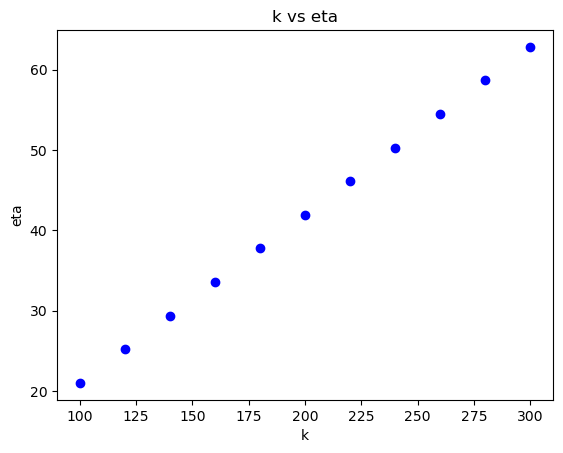

In [253]:
plt.scatter(k, eta, color='blue', marker='o')
plt.xlabel('k')
plt.ylabel('eta')
plt.title('k vs eta')
plt.show()

### Plotting the surface of eta plus and eta minus

In [229]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(20, 100, 30)
y = np.linspace(20, 100, 30)

x, y = np.meshgrid(x, y)

# Define a function for the surface
def surface_function(x, y):
    m= multi_likelihood_to_minimize(np.array([250,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)



-0.032917129421085614
-0.032917129421085614
-0.03794771397677962
-0.044771999518754726
-0.05089746874125964
-0.055993275289105505
-0.0601376610836986
-0.06325686045556894
-0.06576123576142456
-0.03743461632467494
-0.03482498943040469
-0.03915377798735992
-0.04459076269149744
-0.051174857331685454
-0.055209703487925976
-0.059523938551682254
-0.062404373256348684
-0.06472817019163579
-0.04252235120392248
-0.03861374012067929
-0.03636460983711756
-0.040011833434390916
-0.044610823743446965
-0.05036864707704271
-0.054592749098443034
-0.058490871976861265
-0.06168067903934334
-0.06424353543901619
-0.047687053679709386
-0.04341071960026533
-0.03972010338153292
-0.037611549774037675
-0.04070708211885765
-0.04501979784115778
-0.05001431717043478
-0.054190116830220035
-0.05751408185014966
-0.06089269009400172
-0.0633425988676219
-0.05245699774893264
-0.04717878760898222
-0.044011815154492026
-0.040380121279968074
-0.03862025811097675
-0.04105376144577002
-0.04497565576380568
-0.0495901189537034

In [227]:
z_min = np.nanmin(z)
x_min,y_min = np.where(z==z_min)
x_min,y_min


(array([0]), array([7]))

-0.06576123576142456
-0.032917129421085614


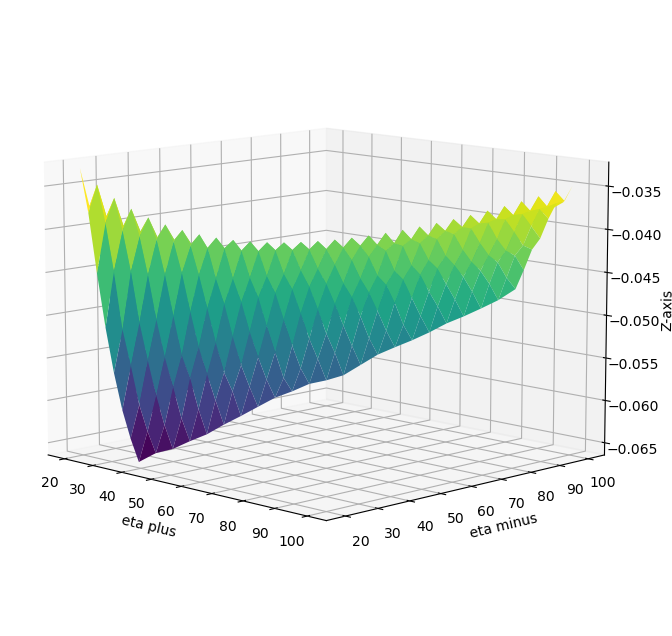

In [230]:
# Plot the surface
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=10, azim=-45)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()

Plotting surface of other functions

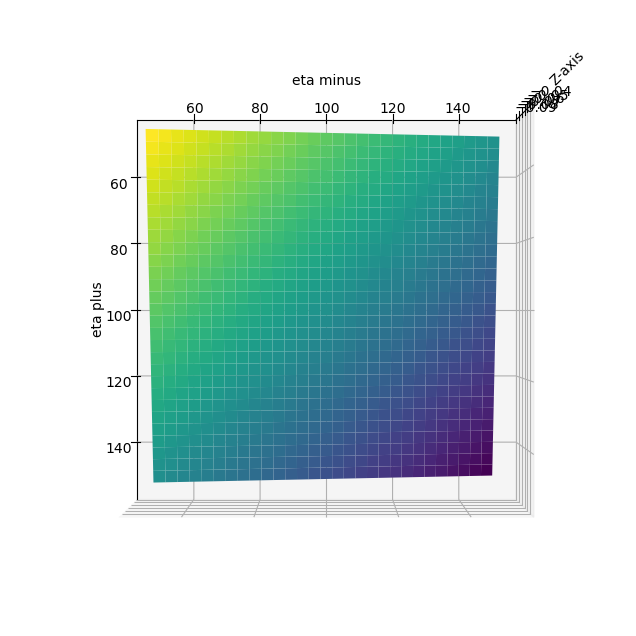

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(50, 150, 30)
y = np.linspace(50, 150, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_integral_alpha(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

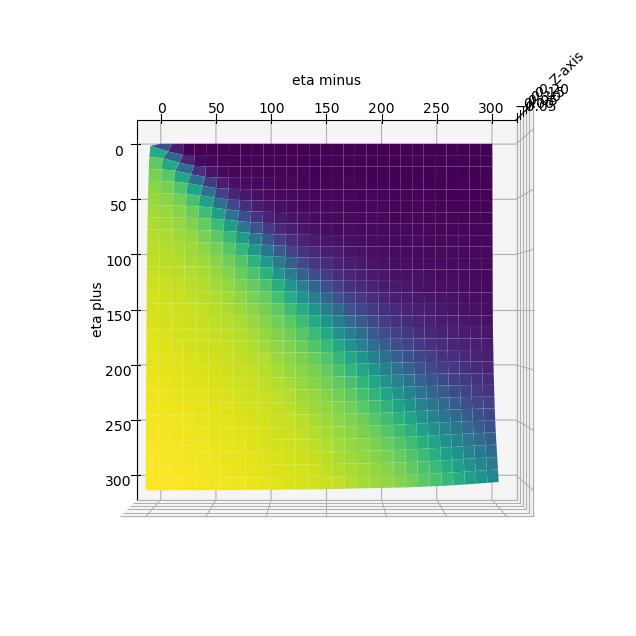

In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(0, 300, 30)
y = np.linspace(0, 300, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_plus(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

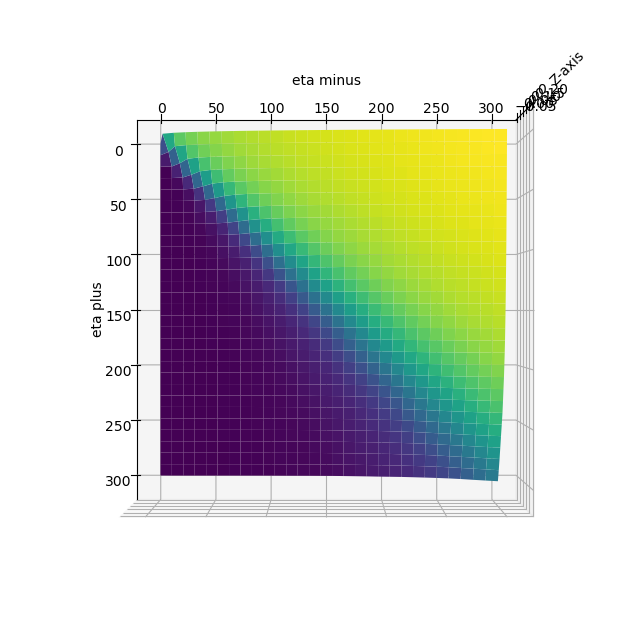

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(0, 300, 30)
y = np.linspace(0, 300, 30)

x, y = np.meshgrid(x, y)
def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_minus(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    return m
# Define a function for the surface
def surface_function(x, y):
    m= other_func(np.array([200,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=90, azim=0)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

Sum of eta plus and eta minus integrals

In [73]:
z.shape

(5452,)

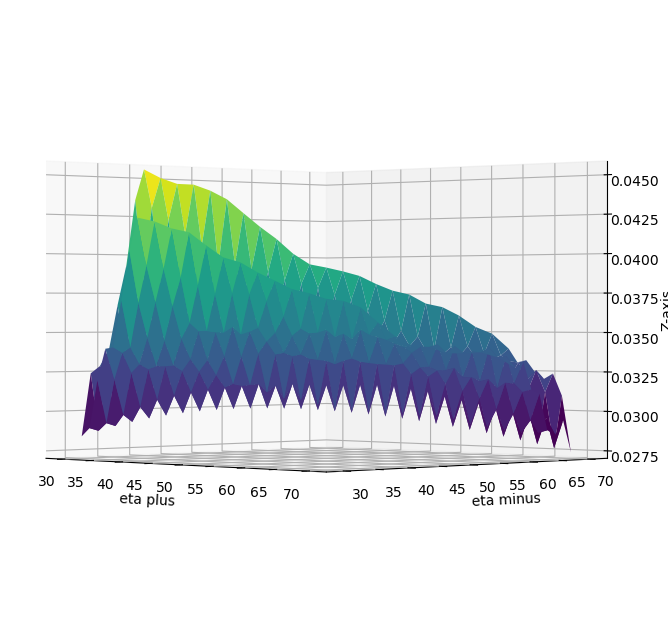

In [98]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(30, 70, 30)
y = np.linspace(30, 70, 30)

x, y = np.meshgrid(x, y)

# # Apply the constraint
# mask = np.abs(x - y) < 20
# x = x[mask]
# y = y[mask]

def other_func(x):
    m = MaximumLikelihood.multi_sum_log_alpha_minus(multi_params, x)/len(multi_params)/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    # print(m)
    p = MaximumLikelihood.multi_sum_log_alpha_plus(multi_params, x)/len(multi_params)/1000
    if np.isnan(p) or np.isinf(p):
        n = 1000
    a = MaximumLikelihood.multi_integral_alpha(multi_params, x)/len(multi_params)/1000
    if np.isnan(a) or np.isinf(a):
        a = 1000
    # print(m)
    return m + p + a

# Define a function for the surface
def surface_function(x, y):
    if np.abs(x-y) >10:
        return np.nan
    m= other_func(np.array([220,x,y,0.05]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)


# Plot the surface
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
# ax.scatter(x, y, z, c=z, cmap='viridis')
ax.view_init(elev=0, azim=-45)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# Show the plot
plt.show()

## Maximum likelihood using longer T

In [254]:
from simulations import generate_simulations_bunchs
from parameters import Parameters, base_simulation_parameters_dict
import pandas as pd
import numpy as np


p = Parameters(**base_simulation_parameters_dict)
p.dalpha = 30
p.T = 300
p.n = 200
print(p)
results = generate_simulations_bunchs(p)


Parameters(q_max=4, T=300, A=300, dalpha=30, Delta=0.005, epsilon=0.005, psi=0.01, phi_=1e-06, eta_plus=60.0, eta_minus=60.0, sigma=0.01, k=200.0, xi=1.0, lambda_plus=1.0, lambda_minus=1.0, theta=0.1, s0=100, n=200, drift=True)
Calculating h
Starting h calculation
0.0004995003608890108
600600
Starting to calculate h


In [ ]:
import numpy as np
from scipy.optimize import minimize
from scipy import optimize
from likelihood import MaximumLikelihood

def multi_likelihood_to_minimize(y, k=200, theta=0.1):
    bad_result = 1000 #np.nan
    x=np.array([k, y[0], y[0], theta])
    if np.abs(x[1]-x[2]) >20:
        return bad_result
    if x[0]<0 or x[1]<0 or x[2]<0 or x[3]<0:
        return bad_result
    if x[0]>1500 or x[1]>1500 or x[2]>1500 or x[3]>1500:
        return bad_result
    m = MaximumLikelihood.multi_likelihood_to_minimize(multi_params, x)/l/1000
    if np.isnan(m) or np.isinf(m):
        m = 1000
    print(m)
    return m

In [ ]:
l = 100

In [ ]:
from likelihood import MaximumLikelihood
tau0_plus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_plus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
tau0_minus_dict = MaximumLikelihood.get_times(zip(*np.where(results["dMt0_minus"][:l,:])), p.dt)
s_jumps = (results['s']-np.roll(results['s'], 1))
t_minus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] < 0)), p.dt)
t_plus_dict = MaximumLikelihood.get_times(zip(*np.where(s_jumps[:l,:] > 0)), p.dt)
print(multi_params[0]['tau_0_minus'])
print(multi_params[0]['t_minus'])
print(multi_params[0]['tau_0_plus'])
print(multi_params[0]['t_plus'])

In [ ]:

# Inequality constraints
# constraints = (
#     {'type': 'ineq', 'fun': lambda y: -np.abs(y[1] - y[2]) + 5},
# )

# x0 = np.array([200, 60, 60, 0.1])  # the 4 parameters to optimize
# x0 = np.random.rand(4)*100
x0 = np.ones(1)*100
# x0 = np.zeros(2)

# bounds = [(10, 300), (40, 500)]#,(40, 500)] #(0, 2)
options = {'maxiter': 1000}
res = minimize(multi_likelihood_to_minimize, x0, method='Nelder-Mead',#
               options=options,
            #    bounds=bounds,
            #    constraints=constraints,
               )
# res = optimize.fmin_cobyla(m.likelihood_to_minimize, x0, cons=[], args=(), maxfun=100000,)
# optimize.differential_evolution(m.likelihood_to_minimize, bounds, args=(), strategy='rand1exp', maxiter=10000, popsize=15, tol=0.01, mutation=(0.5, 1), recombination=0.7, seed=None, callback=None, disp=False, polish=True, init='latinhypercube', atol=0, updating='immediate', workers=1, constraints=(), x0=None,)

print(res)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a bidimensional grid
x = np.linspace(20, 100, 30)
y = np.linspace(20, 100, 30)

x, y = np.meshgrid(x, y)

# Define a function for the surface
def surface_function(x, y):
    m= multi_likelihood_to_minimize(np.array([250,x,y,0.1]))
    # print(m)
    return m

surface_function_vectorized = np.vectorize(surface_function)

z = surface_function_vectorized(x, y)

In [ ]:
z_min, z_max = np.nanmin(z), np.nanmax(z)
print(z_min)
print(z_max)
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x, y, z, cmap='viridis')
ax.view_init(elev=10, azim=-45)
# Add labels
ax.set_xlabel('eta plus')
ax.set_ylabel('eta minus')
ax.set_zlabel('Z-axis')

# ax.scatter(x_min, y_min, z_min, color='red', marker='o', s=100, label='Minimum Point')

# Show the plot
plt.show()

## Getting real data to estimate brazil parameters

In [ ]:
import pandas as pd
df = pd.read_csv("brazil_parameters/md_20230731.csv")
df["timestamp"] = pd.to_datetime(df["timestamp"])

In [1]:
df["timestamp"] =  df["timestamp"] - df["timestamp"].min()
df["time"] = (df['timestamp'] - df['timestamp'].min()).dt.total_seconds()

TypeError: unsupported operand type(s) for -: 'str' and 'str'

In [ ]:
tau0_plus = df[df["ismoplus"]]['time'].unique()
tau0_minus = df[df["ismominus"]]['time'].unique()
t_minus = df[df["isjumpplus"]]['time'].unique()
t_plus = df[df["isjumpminus"]]['time'].unique()
T=df["time"].max()